In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import numpy.matlib

import skimage
from skimage import feature

FOM = 0.5259025987214838


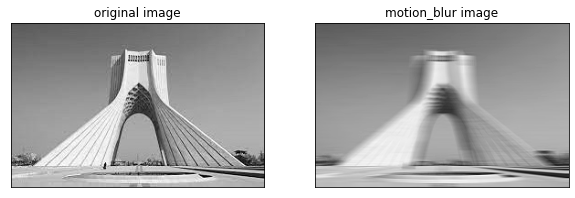

In [8]:
def create_motion_blur(img):
  size = 15
  # generating the kernel
  kernel_motion_blur = np.zeros((size, size))
  kernel_motion_blur[int((size-1)/2), :] = np.ones(size)
  kernel_motion_blur = kernel_motion_blur / size

  # applying the kernel to the input image
  motion_blur_img = cv2.filter2D(img, -1, kernel_motion_blur)

  return motion_blur_img

def FOM(img1, img2):
  [m, n] = img1.shape

  # Canny edge detector
  RefIm = feature.canny(img1)
  TestIm = feature.canny(img2)

  # Number of edge pixels in original image
  B = np.sum(RefIm)
  # Number of edge pixels in test image
  C = np.sum(RefIm)
  landa=1/9
  S=0
  co = np.transpose(np.nonzero(RefIm)) # [co[:,0], co[:,1]]
  cn = np.transpose(np.nonzero(TestIm)) # [cn[:,0], cn[:,1]]

  for i in range(cn.shape[0]):
    cc = co - np.tile(cn[i,:],(co.shape[0],1))
    cc = cc**2
    dist = np.sqrt(cc[:,0] + cc[:,1])
    d = np.min(dist)
    S = S+ (1/(1+d**2*landa))
  fom = S/max(B,C)
  return fom


img = np.array(cv2.imread(filename="azadi_tower.jpg", flags=cv2.IMREAD_GRAYSCALE)).astype('uint8')

motion_blur_img = create_motion_blur(img)


print("FOM = {}".format(FOM(img, motion_blur_img)))

fig, axes= plt.subplots(1, 2, figsize=(10, 8))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('original image')

axes[1].imshow(motion_blur_img, cmap='gray')
axes[1].set_title('motion_blur image')


for ax in axes.ravel():
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()
